In [24]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [8]:
df = pd.read_csv('data files/gender_classification.csv')

In [9]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [10]:
df.shape

(5001, 8)

In [12]:
df.gender.value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [14]:
encoder = LabelEncoder()

In [16]:
df.gender = encoder.fit_transform(df.gender)

In [17]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [18]:
df.gender.unique()

array([1, 0])

In [19]:
#Shuffling the data in dataframe
df = df.sample(5001)

In [22]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
1405,1,13.4,6.4,0,0,0,0,0
1477,0,14.4,6.0,1,1,1,1,1
1362,1,13.5,6.6,1,0,1,1,1
3656,1,12.0,5.3,0,0,0,0,0
3364,0,12.3,6.3,0,1,1,0,0


In [27]:
df_train = df.iloc[:4000,:].sample(2000)
df_val = df.iloc[4001:4500,:].sample(200)
df_test = df.iloc[4501:5001,:].sample(200)

In [30]:
df_train.count()

long_hair                    2000
forehead_width_cm            2000
forehead_height_cm           2000
nose_wide                    2000
nose_long                    2000
lips_thin                    2000
distance_nose_to_lip_long    2000
gender                       2000
dtype: int64

In [44]:
#Splitting the validation data into X(input), and y(output) variable
X_val = df_val.iloc[:,:7].values
y_val = df_val.iloc[:,-1].values

In [47]:
X_train = df_train.iloc[:,:7].values
y_train = df_train.iloc[:,-1].values

In [48]:
X_train

array([[ 1. , 14.8,  5.6, ...,  1. ,  1. ,  1. ],
       [ 1. , 15.3,  5.3, ...,  1. ,  1. ,  1. ],
       [ 1. , 11.9,  5.5, ...,  1. ,  1. ,  1. ],
       ...,
       [ 0. , 11.8,  5.8, ...,  0. ,  0. ,  0. ],
       [ 1. , 13.2,  6.1, ...,  1. ,  0. ,  0. ],
       [ 1. , 15.1,  6.6, ...,  1. ,  1. ,  1. ]])

In [53]:
y_train

array([1, 1, 1, ..., 0, 0, 1])

In [50]:
X_test = df_test.iloc[:,:7].values
y_test= df_test.iloc[:,-1].values

In [51]:
X_test

array([[ 1. , 13.8,  6.7, ...,  1. ,  1. ,  1. ],
       [ 1. , 14.8,  5.7, ...,  1. ,  1. ,  1. ],
       [ 1. , 14.6,  5.4, ...,  0. ,  1. ,  1. ],
       ...,
       [ 1. , 11.9,  6.7, ...,  0. ,  1. ,  1. ],
       [ 1. , 14.8,  5.3, ...,  1. ,  1. ,  1. ],
       [ 1. , 13. ,  6.9, ...,  1. ,  1. ,  0. ]])

In [52]:
y_test

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1])

## Case1: Bagging

In [101]:
#out model that predicts and plots results
def evaluate(clf,X,y):
    value=1.5
    width=0.75
    clf.fit(X,y)
    pca = PCA(n_components = 2)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,filler_feature_values={2: value, 3:value, 4:value , 5:value, 6:value},
                          filler_feature_ranges={2: width, 3: width, 4:width, 5:width, 6:width},clf=clf,legend=2)
    y_pred = clf.predict(X_val)
    print(accuracy_score(y_val,y_pred))

In [102]:
from sklearn.decomposition import PCA

In [103]:
# Data for Tree 1 
# since we need to do shuffling every time for random selection of records in every tree

df_bag = df_train.sample(200,replace=True)

X = df_bag.iloc[:,0:7]
y = df_bag.iloc[:,-1]


In [104]:
# Creating our classifier
dt_bag1 = DecisionTreeClassifier()

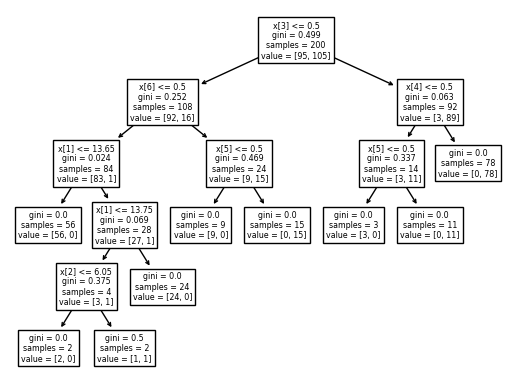

C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.945


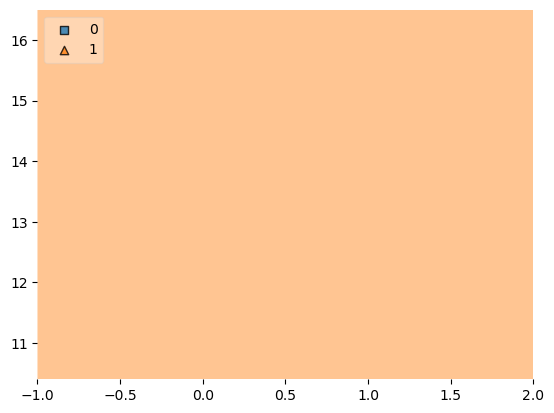

In [105]:
# runninig our model 
evaluate(dt_bag1,X,y)

In [ ]:
#data for tree 2
df_bag2 = df_train.sample(200,replace=True)

X = df_bag2.iloc[:,0:7]
y = df_bag2.iloc[:,-1]

dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

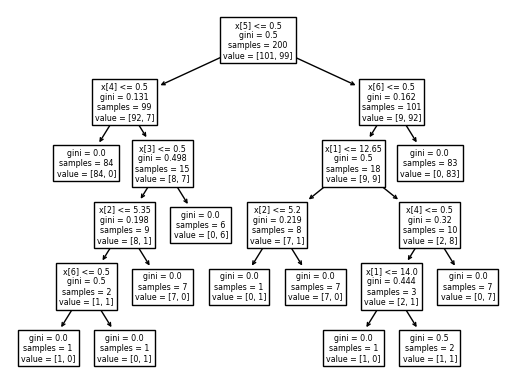

0.955


C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [82]:
#data for tree 3
df_bag3 = df_train.sample(200,replace=True)

X = df_bag3.iloc[:,0:7]
y = df_bag3.iloc[:,-1]

dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [83]:
print("Predictor 1",dt_bag1.predict(np.array([1,13.5,5.9,0,0,0,0]).reshape(1,7)))
print("Predictor 2",dt_bag2.predict(np.array([1,13.5,5.9,0,0,0,0]).reshape(1,7)))
print("Predictor 3",dt_bag3.predict(np.array([1,13.5,5.9,0,0,0,0]).reshape(1,7)))

Predictor 1 [0]
Predictor 2 [0]


C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.